# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

**Импортируем нужные библиотеки**

In [71]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
import warnings


In [72]:
warnings.filterwarnings('ignore')

In [73]:
data= pd.read_csv('/datasets/users_behavior.csv')

In [74]:
data.head() #посмотрим на первые пять строк

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [75]:
data.info() #выведеи общую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [76]:
data.duplicated().sum() #на всякий случай ещё проверю на дубликаты 

0

**ВЫВОДЫ**
- Датасет состоит из 5 столбцов и 3214 строк. Пропусков нет (хвала богам) как и дубликатов 
- Типы данных тоже соответсвуют, менять ничего не нужно


**Названия столбоцов :**

- сalls — количество звонков,
- minutes — суммарная длительность звонков в минутах,
- messages — количество sms-сообщений,
- mb_used — израсходованный интернет-трафик в Мб,
- is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

In [77]:
data.corr()

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.982083,0.177385,0.286442,0.207122
minutes,0.982083,1.000000,0.173110,0.280967,0.206955
messages,0.177385,0.173110,1.000000,0.195721,0.203830
mb_used,0.286442,0.280967,0.195721,1.000000,0.198568
is_ultra,0.207122,0.206955,0.203830,0.198568,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f33b9b15390>,
      dtype=object)

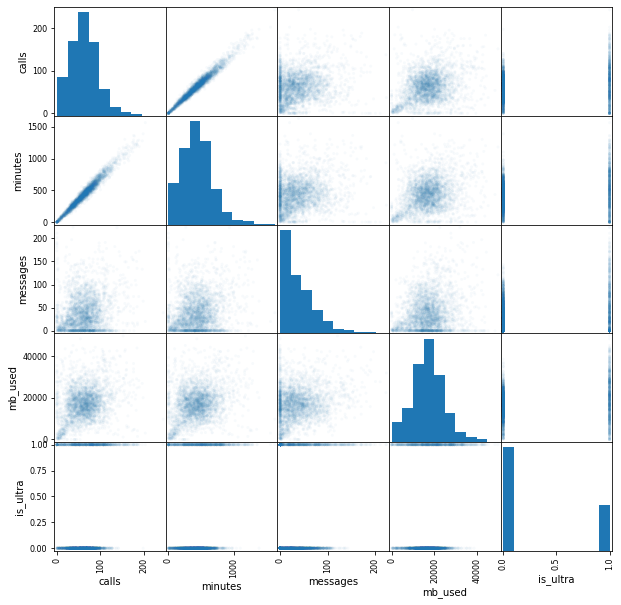

In [78]:
pd.plotting.scatter_matrix(data, figsize=(10, 10), alpha=0.03)

## Разбение данные на выборки

Разобьем датасет на 3 выборки:
- Обучающую
- Валидационную 
- Тестовую

In [79]:
data_train, data_valid_test=train_test_split(data,train_size=0.6,test_size=0.4,random_state=1234)
data_valid,data_test=train_test_split(data_valid_test,test_size=0.5,random_state=1234)

In [80]:
len(data_train) # выборка для обучения

1928

In [81]:
len(data_valid) # выборка валидационная

643

In [82]:
len(data_test) # выборка тестовая

643

## Исследуем модели

На базе обучающей выборки формирую датасет признаков и целевой признак

In [83]:
features_train=data_train.drop(['is_ultra'],axis=1) # признаки 
target_train=data_train['is_ultra'] # целевой признак

На базе валидационной выборки формирую датасет признаков и целевой признак


In [84]:
features_valid=data_valid.drop(['is_ultra'],axis=1) # признаки 
target_valid=data_valid['is_ultra'] # целевой признак

На базе тестовой выборки формирую датасет признаков и целевой признак

In [85]:
features_test=data_valid.drop(['is_ultra'],axis=1) # признаки 
target_test=data_valid['is_ultra'] # целевой признак

### Дерево решений 

In [86]:
for depth in range(1,20):
    model_tree=DecisionTreeClassifier(random_state=1234, max_depth=depth) # присваиваем модели имя
    model_tree.fit(features_train,target_train) # обучаем
    prediction_tree=model_tree.predict(features_valid) # проверяем
    print('max_depth:',depth,end='')
    print(' accuracy:',accuracy_score(prediction_tree,target_valid))

max_depth: 1 accuracy: 0.776049766718507
max_depth: 2 accuracy: 0.8009331259720062
max_depth: 3 accuracy: 0.8118195956454122
max_depth: 4 accuracy: 0.8009331259720062
max_depth: 5 accuracy: 0.8087091757387247
max_depth: 6 accuracy: 0.8180404354587869
max_depth: 7 accuracy: 0.8320373250388803
max_depth: 8 accuracy: 0.8242612752721618
max_depth: 9 accuracy: 0.8180404354587869
max_depth: 10 accuracy: 0.8149300155520995
max_depth: 11 accuracy: 0.8180404354587869
max_depth: 12 accuracy: 0.807153965785381
max_depth: 13 accuracy: 0.8040435458786936
max_depth: 14 accuracy: 0.8055987558320373
max_depth: 15 accuracy: 0.7744945567651633
max_depth: 16 accuracy: 0.7744945567651633
max_depth: 17 accuracy: 0.7480559875583204
max_depth: 18 accuracy: 0.7527216174183515
max_depth: 19 accuracy: 0.744945567651633


### Случайный лес

In [87]:
for estim in range(1,30):    
    model_forest=RandomForestClassifier(max_depth=10,n_estimators=estim,random_state=1234,min_samples_leaf=5) # присваиваем модели имя
    model_forest.fit(features_train,target_train) # обучаем
    prediction_forest=model_forest.predict(features_valid) # проверяем
    print('n_estimators:',estim,end="")
    print(' accuracy:',accuracy_score(prediction_forest,target_valid))

n_estimators: 1 accuracy: 0.8055987558320373
n_estimators: 2 accuracy: 0.8040435458786936
n_estimators: 3 accuracy: 0.8149300155520995
n_estimators: 4 accuracy: 0.8242612752721618
n_estimators: 5 accuracy: 0.8320373250388803
n_estimators: 6 accuracy: 0.8304821150855366
n_estimators: 7 accuracy: 0.838258164852255
n_estimators: 8 accuracy: 0.8398133748055988
n_estimators: 9 accuracy: 0.8429237947122862
n_estimators: 10 accuracy: 0.838258164852255
n_estimators: 11 accuracy: 0.8429237947122862
n_estimators: 12 accuracy: 0.8444790046656299
n_estimators: 13 accuracy: 0.8398133748055988
n_estimators: 14 accuracy: 0.838258164852255
n_estimators: 15 accuracy: 0.8398133748055988
n_estimators: 16 accuracy: 0.8398133748055988
n_estimators: 17 accuracy: 0.838258164852255
n_estimators: 18 accuracy: 0.8367029548989113
n_estimators: 19 accuracy: 0.838258164852255
n_estimators: 20 accuracy: 0.8367029548989113
n_estimators: 21 accuracy: 0.8367029548989113
n_estimators: 22 accuracy: 0.8367029548989113
n_

### Логистическая регрессия

In [88]:
model_logistic_Reg=LogisticRegression() # присваиваем модели имя
model_logistic_Reg.fit(features_train,target_train) # обучаем
predict_LogisticReg=model_logistic_Reg.predict(features_valid) # проверяем
print('accuracy:',accuracy_score(predict_LogisticReg,target_valid))

accuracy: 0.7216174183514774


**ВЫВОДЫ**

Обучая три разный модели были полученны метрики качества:

- Accuracy модели "Дерево предсказания" при гиперпараметрах max_depth= 7: 0.83
- Accuracy модели "Случайный лес" при гиперпараметрах max_depth= 10, max_samples_leaf=5 и n_estimators= 11: 0.84
- Accuracy модели "Логистическая регрессия": 0.72

## Проверяем модель на тестовой выборке

### Дерево решений

In [89]:
model_tree=DecisionTreeClassifier(random_state=1234, max_depth=7)
model_tree.fit(features_train,target_train)
prediction_tree=model_tree.predict(features_test)
print('max_depth:',depth,end='')
print(' accuracy:',accuracy_score(prediction_tree,target_test))

max_depth: 19 accuracy: 0.8320373250388803


### Случайный лес 

In [90]:
model_forest=RandomForestClassifier(max_depth=10,n_estimators=9,random_state=1234,min_samples_leaf=5)
model_forest.fit(features_train,target_train)
prediction_forest=model_forest.predict(features_test)
print('n_estimators:',estim,end="")
print(' accuracy:',accuracy_score(prediction_forest,target_test))

n_estimators: 29 accuracy: 0.8429237947122862


### Логистическая регрессия 

In [91]:
model_logistic_Reg=LogisticRegression()
model_logistic_Reg.fit(features_train,target_train)
predict_LogisticReg=model_logistic_Reg.predict(features_test)
print('accuracy:',accuracy_score(predict_LogisticReg,target_test))

accuracy: 0.7216174183514774


## ВЫВОДЫ

- Лучше всего себя показала модель "Случайный лес" с точносью 0.84.
- Проверили модели на тестовой выборке. Метрики качества тестовой выборки оказались равны метрикам качества валидационной модели.

## (бонус) Проверяем модели на адекватность

In [94]:
#импорт 
from sklearn.dummy import DummyClassifier
#присваиваем модели имя
model_crazy = DummyClassifier(strategy = 'most_frequent', random_state = 12345)
#обучаем модель
model_crazy.fit(features_train, target_train)
#проверяем 
result_model_crazy = model_crazy.score(features_valid, target_valid)
result_model_crazy

0.7060653188180405